In [1]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

curses is not supported on this machine (please install/reinstall curses for an optimal experience)
Instructions for updating:
Colocations handled automatically by placer.


In [14]:
os.chdir("D:\\Education\\Data Science\\Workspace_R")

In [22]:
TRAIN_DIR = 'train'
TEST_DIR = 'test1'
IMG_SIZE = 50
LR = 1e-3
MODEL_NAME = 'dogs-vs-cats-convnet'
def create_label(image_name):
    """ Create an one-hot encoded vector from image name """
    word_label = image_name.split('.')[-3]
    if word_label == 'cat':
        return np.array([1,0])
    elif word_label == 'dog':
        return np.array([0,1])

In [23]:
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        path = os.path.join(TRAIN_DIR, img)
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE))
        training_data.append([np.array(img_data), create_label(img)])
    shuffle(training_data)
    np.save('train_data.npy', training_data)
    return training_data

In [24]:
def create_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR, img)
        img_num = img.split('.')[0]
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE))
        testing_data.append([np.array(img_data), img_num])
    shuffle(testing_data)
    np.save('test_data.npy', testing_data)
    return testing_data

In [25]:
# If dataset is not created:
train_data = create_train_data()
test_data = create_test_data()
# If you have already created the dataset:
# train_data = np.load('train_data.npy')
# test_data = np.load('test_data.npy')
train = train_data[:-500]
test = train_data[-500:]
X_train = np.array([i[0] for i in train]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train = [i[1] for i in train]
X_test = np.array([i[0] for i in test]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test = [i[1] for i in test]


100%|██████████| 12500/12500 [00:46<00:00, 267.18it/s]


In [ ]:
#here 32 filters,5 stride(movement) and drop out is the place where prob is reached to our mentioned criteria,and this is where our model finished

In [26]:
# Building The Model

tf.reset_default_graph()
convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')
convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)
convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')
model = tflearn.DNN(convnet, tensorboard_dir='log', tensorboard_verbose=0)
model.fit({'input': X_train}, {'targets': y_train}, n_epoch=10,
          validation_set=({'input': X_test}, {'targets': y_test}),
          snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 3829  | total loss: 0.37808 | time: 72.302s
| Adam | epoch: 010 | loss: 0.37808 - acc: 0.8355 -- iter: 24448/24500
Training Step: 3830  | total loss: 0.38193 | time: 73.491s
| Adam | epoch: 010 | loss: 0.38193 - acc: 0.8300 | val_loss: 0.49714 - val_acc: 0.7660 -- iter: 24500/24500
--


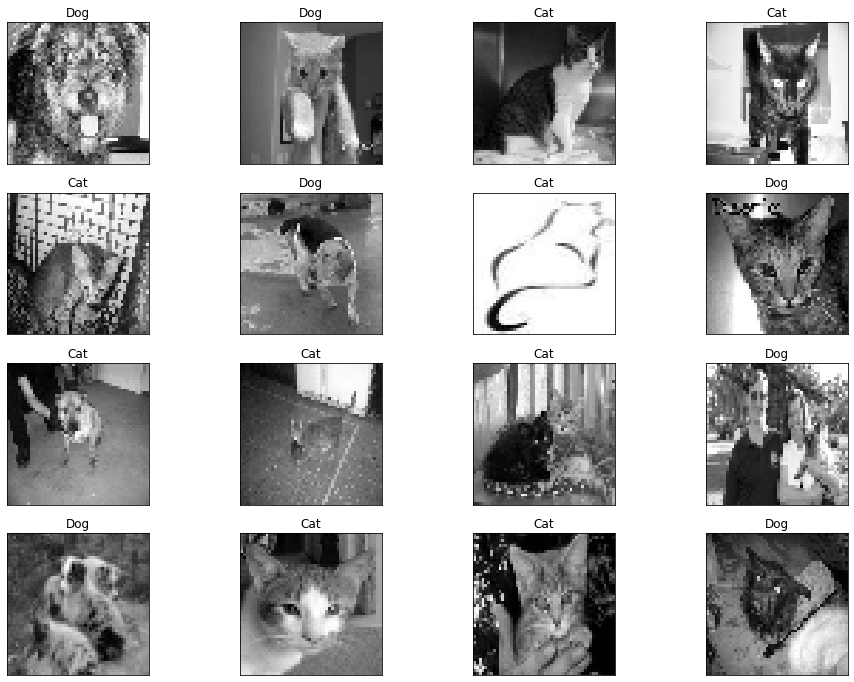

In [27]:
fig = plt.figure(figsize=(16, 12))

for num, data in enumerate(test_data[:16]):

    img_num = data[1]
    img_data = data[0]

    y = fig.add_subplot(4, 4, num + 1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1)
    model_out = model.predict([data])[0]

    if np.argmax(model_out) == 1:
        str_label = 'Dog'
    else:
        str_label = 'Cat'

    y.imshow(orig, cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()